# <center>*Triển khai xây dựng mô hình dự đoán bệnh tiểu đường (dùng DessionTree, KNN) và xử lý mất cân bằng dữ liệu*
</center>


## A. MÔ TẢ TẬP DỮ LIỆU:

Tập dữ liệu `Data_Diabetes.csv` chứa kết quả xét nghiệm về bệnh tiểu đường của 723 bệnh nhân, tất cả đều là nữ. Mỗi bản ghi thể hiện thông tin của một bệnh nhân và bao gồm 9 thuộc tính sau:
1. **Pregnancies:** Số lần mang thai
2. **Glucose:** Chỉ số đường trong máu (Gluco)
3. **BloodPressure:** Huyết áp (đơn vị: mm Hg)
4. **SkinThickness:** Độ dày của da (đơn vị: mm)
5. **Insulin:** Chỉ số Insulin (đơn vị: mu U/ml)
6. **BMI:** Chỉ số BMI (Body Mass Index), tính bằng cân nặng chia cho bình phương chiều cao (đơn vị: kg/m^2)
7. **DiabetesPedigreeFunction:** Hệ số phả hệ cho bệnh tiểu đường
8. **Age:** Tuổi
9. **Outcome:** Kết quả xác định liệu bệnh nhân có mắc bệnh tiểu đường hay không:
   - Không mắc tiểu đường (0)
   - Mắc tiểu đường (1)
iểu đường (1)

## B.YÊU CẦU:

1. **Đọc và quan sát dữ liệu:** 
   - Đọc file dữ liệu và quan sát các đặc trưng thống kê của tập dữ liệu.
   
2. **Đánh giá và cân bằng dữ liệu:** 
   - Đánh giá mức độ cân bằng của dữ liệu.
   - Thực hiện cân bằng dữ liệu (Xem thêm phương pháp cân bằng dữ liệu theo [link](#)).
   
3. **Phân tích biến:** 
   - Phân tách các biến Độc lập (X) và Phụ thuộc (Y).
   
4. **Chia tập dữ liệu:** 
   - Chia tập dữ liệu thành hai phần: Train và Test.
   
5. **Huấn luyện và đánh giá mô hình:** 
   - Sử dụng một trong các thuật toán đã học: kNN, Decision Tree, Naïve Bayes.
   - Tùy chỉnh các tham số để tối ưu độ chính xác của mô hình.
   - Kết quả cần hiển thị:
   
       - Độ chính xác (accuracy) của mô hình trên tập Train và Test.
       - Số lượng mẫu dự đoán đúng và sai trên tập Test.
       - Ma trận confusion matrix trên tập Test.
       - Tính toán và đánh giá F1-Score, Recall của mô hình.

7. **Dự đoán trên dữ liệu mới:** 
   - Sử dụng mô hình đã huấn luyện để dự đoán trên dữ liệu mới với các thông số sau:
     - Pregnancies: 0
     - Glucose: 128
     - BloodPressure: 78
     - SkinThickness: 30
     - Insulin: 138
     - BMI: 30
     - DiabetesPedigreeFunction: 1,18
     - Age: 23


# <center>Bắt đầu thực hiện bài toán
</center>

## Gọi các thư viện ##

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Đọc và quan sát dữ liệu

In [44]:
#đọc dư liệu
df_diabete = pd.read_csv('Data_Diabetes.csv')
df_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               723 non-null    int64  
 1   Glucose                   723 non-null    int64  
 2   BloodPressure             723 non-null    int64  
 3   SkinThickness             723 non-null    float64
 4   Insulin                   723 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  723 non-null    float64
 7   Age                       723 non-null    int64  
 8   Outcome                   723 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


**Từ tổng quan bộ dữ liệu cho ta thấy không có thuộc tính nào trong bộ dữ liệu bị missing**

In [45]:
#Quan sát các đăt trưng thống kê
df_diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
718,10,101,76,48.0,180.0,32.9,0.171,63,0
719,2,122,70,27.0,126.0,36.8,0.340,27,0
720,5,121,72,23.0,112.0,26.2,0.245,30,0
721,1,126,60,29.0,126.0,30.1,0.349,47,1


## 2. Đánh giá và cân bằng dữ liệu

Outcome
Không bị tiểu đường    474
Bị tiểu đường          249
Name: count, dtype: int64


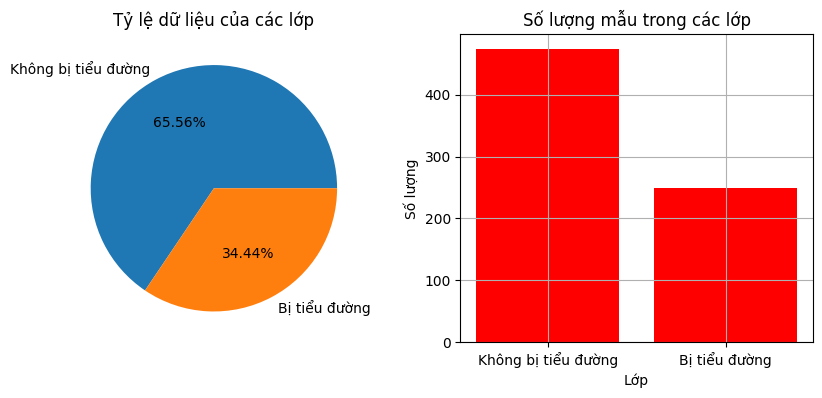

In [46]:
# Kiểm tra cân bằng dữ liệu
check = df_diabete['Outcome'].value_counts()

# Đổi tên lớp
labels = {0: 'Không bị tiểu đường', 1: 'Bị tiểu đường'}
check.index = check.index.map(labels)

print(check)

plt.figure(figsize=(10, 4))

# Biểu đồ pie
plt.subplot(1, 2, 1)
plt.title('Tỷ lệ dữ liệu của các lớp')
plt.pie(check.values, labels=check.index, autopct='%.2f%%')

# Biểu đồ bar
plt.subplot(1, 2, 2)
plt.bar(check.index, check.values, color='r')
plt.title('Số lượng mẫu trong các lớp')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.grid('--')

plt.show()


**Tỉ lệ phân bố: Có khoảng 65.6% số người trong bộ dữ liệu không bị tiểu đường và khoảng 34.4% bị tiểu đường. Điều này cho thấy bộ dữ liệu không cân bằng giữa hai nhóm.**

### 2.1 Xử lý mất cân bằng dữ liệu

**Thực hiện cân bằng dữ liệu bằng phương pháp SMOTE (tăng số lưọng mẫu lóp thiểu số) kết hợp với phương pháp Random UnderSampling (giảm số lượng dữ liệu lớp đa số)**

Số lượng mẫu sau khi resample: Counter({0: 394, 1: 355})


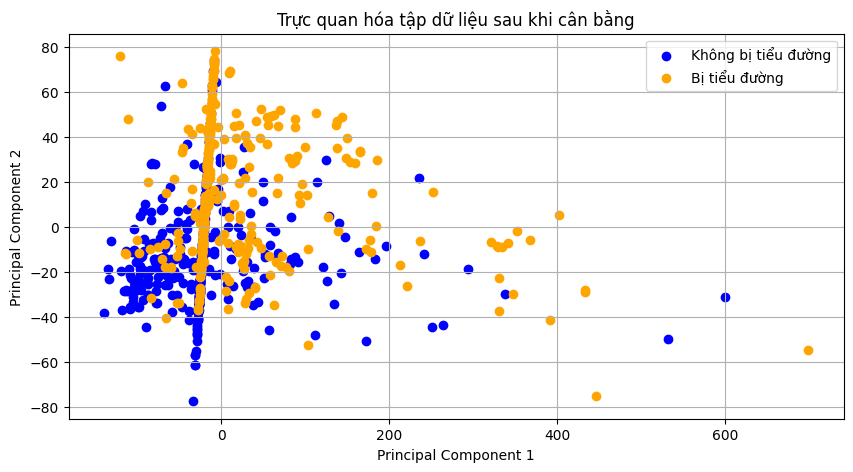

In [47]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.decomposition import PCA  # Để giảm số chiều dữ liệu cho việc trực quan hóa


# Tách dữ liệu thành features (X) và target (y)
X = df_diabete.drop('Outcome', axis=1)
y = df_diabete['Outcome']

# Thiết lập cho phương pháp oversampling và undersampling
over = SMOTE(sampling_strategy=0.75) 
under = RandomUnderSampler(sampling_strategy=0.9)  

steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

# Áp dụng pipeline trên dữ liệu
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Đếm số lượng mẫu mới
counter_resampled = Counter(y_resampled)
print("Số lượng mẫu sau khi resample:", counter_resampled)

# Sử dụng PCA để giảm số chiều dữ liệu xuống còn 2D cho việc trực quan hóa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Trực quan hóa dữ liệu
plt.figure(figsize=[10, 5])
colors = ['blue', 'orange']
labels = ['Không bị tiểu đường', 'Bị tiểu đường']
for i, label in enumerate(np.unique(y_resampled)):
    plt.scatter(X_pca[y_resampled == label, 0], X_pca[y_resampled == label, 1], color=colors[i], label=labels[i])

plt.title('Trực quan hóa tập dữ liệu sau khi cân bằng')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## 3. Phân tách biến độc lập và biến phụ thuộc 

In [48]:
#Phân tách biến độc lập
X = X_resampled
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
62,2,109,92,29.000000,126.000000,42.700000,0.845000,54
500,1,77,56,30.000000,56.000000,33.300000,1.251000,24
341,4,147,74,25.000000,293.000000,34.900000,0.385000,30
317,0,165,76,43.000000,255.000000,47.900000,0.259000,26
152,7,102,74,40.000000,105.000000,37.200000,0.204000,45
...,...,...,...,...,...,...,...,...
824,2,105,80,44.490540,190.372972,33.719595,0.693326,29
825,9,153,87,29.052804,153.104952,34.784290,0.992126,43
826,6,179,84,36.433484,288.805972,35.306100,0.368201,44
827,3,104,84,29.355397,126.000000,31.404174,0.419893,36


In [49]:
# Phân tách biến phụ thuộc
y = y_resampled
y

62     0
500    0
341    0
317    0
152    0
      ..
824    1
825    1
826    1
827    1
828    1
Name: Outcome, Length: 749, dtype: int64

## 4. Chia tập dữ liệu train - test

In [50]:
from sklearn.model_selection import train_test_split

#Chia tập dữ liệu train (80%) - test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Huấn luyện và đánh giá mô hình

## 5.1 Sử dụng mô hình Cây quyết định (DessionTree)

In [51]:
from sklearn.tree import DecisionTreeClassifier
#Sử dựng mô hình DecissionsTree
model_DeTree = DecisionTreeClassifier(max_depth=6, min_samples_split=7, criterion='entropy', min_samples_leaf=6)

model_DeTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=7)

#### 5.1.1  Độ chính xác của model (accuracy) trên tập Train – Test

In [52]:
#Đánh giá mô độ chính xác mô hình trên tập train và test
accuracy_train_DeTree = model_DeTree.score(X_train, y_train)
print("Độ chính xác trên tập Train:", round(accuracy_train_DeTree,3) * 100,'%')

accuracy_test_DeTree = model_DeTree.score(X_test, y_test)
print("Độ chính xác trên tập test:", round(accuracy_test_DeTree,3) *100,'%')

Độ chính xác trên tập Train: 82.5 %
Độ chính xác trên tập test: 75.3 %


#### 5.1.2. Tổng số mẫu dự đoán đúng - sai trên tập Test  

In [53]:
from sklearn.metrics import accuracy_score

y_pred_DeTree = model_DeTree.predict(X_test)
acc_num_DeTree = accuracy_score(y_test, y_pred_DeTree, normalize=False)

print("Tổng số mẫu dự đoán đúng trên tập test:",acc_num_DeTree, '/', len(y_test))

Tổng số mẫu dự đoán đúng trên tập test: 113.0 / 150


#### 5.1.3. Ma trận confusion matrix trên tập Test

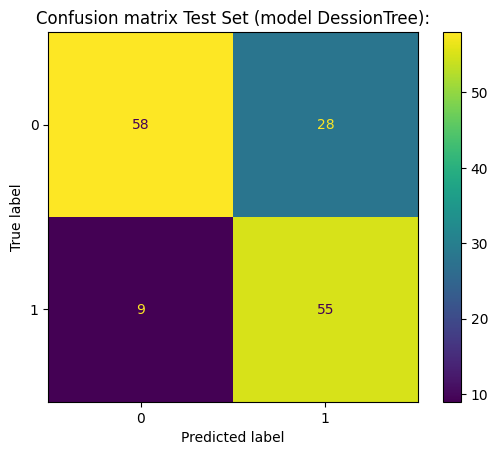

In [54]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_diabete = confusion_matrix(y_test,y_pred_DeTree)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DeTree)
plt.title('Confusion matrix Test Set (model DessionTree):')
plt.show()

#### 5.1.4 Tìm hiểu và tính toán thông số F1-Score, Recall của model 

In [55]:
from sklearn.metrics import f1_score, recall_score

# Dự đoán trên tập train và tập test
y_train_pred_DeTree = model_DeTree.predict(X_train)
y_test_pred_DeTree = model_DeTree.predict(X_test)

# Tính F1-Score trên tập train và tập test
f1_train_DeTree = f1_score(y_train, y_train_pred_DeTree)
f1_test_DeTree = f1_score(y_test, y_test_pred_DeTree)

# Tính Recall trên tập train và tập test
recall_train_DeTree = recall_score(y_train, y_train_pred_DeTree)
recall_test_DeTree = recall_score(y_test, y_test_pred_DeTree)

print("F1-Score trên tập train:", round(f1_train_DeTree,2))
print("F1-Score trên tập test:", round(f1_test_DeTree,2))
print("Recall trên tập train:", round(recall_train_DeTree,2))
print("Recall trên tập test:", round(recall_train_DeTree,2))


F1-Score trên tập train: 0.83
F1-Score trên tập test: 0.75
Recall trên tập train: 0.87
Recall trên tập test: 0.87


## 5.2 Sử dụng mô hình KNN

### 5.2.1 xây dựng mô hình với KNN (mô hình dựa trên K người láng giềng gần)

In [56]:
from sklearn.neighbors  import KNeighborsClassifier
#Sử dựng mô hình DecissionsTree
model_KNN = KNeighborsClassifier(n_neighbors=8, weights='distance')

model_KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8, weights='distance')

### 5.2.2. Độ chính xác của model (accuracy) trên tập Train – Test

In [57]:
#Đánh giá mô độ chính xác mô hình trên tập train và test
accuracy_train_KNN = model_KNN.score(X_train, y_train)
print("Độ chính xác trên tập Train:", round(accuracy_train_KNN,3) * 100,'%')

accuracy_test_KNN = model_KNN.score(X_test, y_test)
print("Độ chính xác trên tập test:", round(accuracy_test_KNN,3) *100,'%')

Độ chính xác trên tập Train: 100.0 %
Độ chính xác trên tập test: 74.7 %


### 5.2.3. Tổng số mẫu dự đoán đúng - sai trên tập Test

In [58]:
from sklearn.metrics import accuracy_score

y_pred_KNN = model_KNN.predict(X_test)
acc_num_KNN = accuracy_score(y_test, y_pred_KNN, normalize=False)

print("Tổng số mẫu dự đoán đúng trên tập test:",acc_num_KNN, '/', len(y_test))

Tổng số mẫu dự đoán đúng trên tập test: 112.0 / 150


### 5.2.4. Ma trận confusion matrix trên tập Test

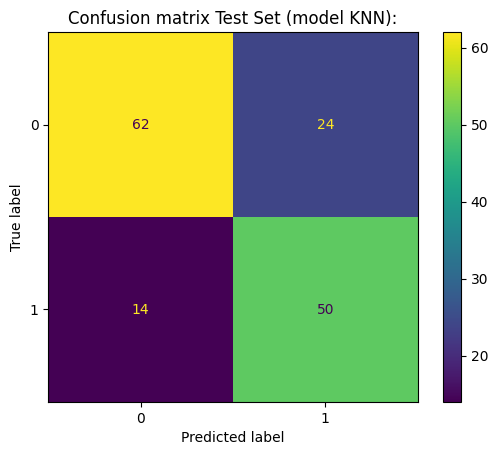

In [59]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_diabete = confusion_matrix(y_test,y_pred_KNN)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
plt.title('Confusion matrix Test Set (model KNN):')
plt.show()

### 5.2.5. Tìm hiểu và tính toán thông số Recall, F1-store của model

In [60]:
from sklearn.metrics import f1_score, recall_score

# Dự đoán trên tập train và tập test
y_train_pred_KNN = model_KNN.predict(X_train)
y_test_pred_KNN = model_KNN.predict(X_test)

# Tính F1-Score trên tập train và tập test
f1_train_KNN = f1_score(y_train, y_train_pred_KNN)
f1_test_KNN = f1_score(y_test, y_test_pred_KNN)

# Tính Recall trên tập train và tập test
recall_train_KNN = recall_score(y_train, y_train_pred_KNN)
recall_test_KNN = recall_score(y_test, y_test_pred_KNN)

print("F1-Score trên tập train của model sử dụng KNN:", round(f1_train_KNN,2))
print("F1-Score trên tập test của model sử dụng KNN:", round(f1_test_KNN,2))
print("Recall trên tập train model KNN:", round(recall_train_KNN,2))
print("Recall trên tập test model KNN:", round(recall_train_KNN,2))


F1-Score trên tập train của model sử dụng KNN: 1.0
F1-Score trên tập test của model sử dụng KNN: 0.72
Recall trên tập train model KNN: 1.0
Recall trên tập test model KNN: 1.0


## 6. Sử dụng model xây dựng được, dự đoán Bệnh nhân với các thông số như sau có bị mắc bệnh tiểu đường hay không?

- **Pregnancies:** 0 
- **Glucose:** 128 
- **BloodPressure:** 78 
- **SkinThickness:** 30 
- **Insulin:** 138 
- **BMI:** 30 
- **DiabetesPedigreeFunction:** 1.18 
- **Age:** 23


In [63]:
patient_data = pd.DataFrame([[0, 128, 78, 30, 138, 30, 1.18, 23]])

# Sử dụng mô hình để dự đoán
prediction = model_KNN.predict(patient_data)

# In kết quả dự đoán
if prediction[0] == 1:
    print("Bệnh nhân có khả năng mắc bệnh tiểu đường.")
else:
    print("Bệnh nhân không có khả năng mắc bệnh tiểu đường.")

Bệnh nhân không có khả năng mắc bệnh tiểu đường.


c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## C. Kết luận
1. Dữ liệu:
    * Có 723 bảng ghi trong bộ dữ liệu trên khá khiêm tốn, chưa thực sử đủ để có thể triển khai và đưa vào thực tế.
    * Xử lý mất cân bằng dữ liệu có thể thực hiện bằng nhiều cách để dưa ra bộ dữ liệu phù hợp.
    **=> Dữ liệu chưa thật sự tối ưu để có thể triển khai vào các dự án thực tế**

2. Bài toán trên được thực hiện với 2 thuật toán DessionTree và KNN cho thấy:
    * Với thuật toán KNN: độ chính xác: 74,7%
    * Thuật toán DessionTree: độ chính xác: 75,3%
    
    **=> Cho ta thấy sự nhỉnh hơn của thuật toán DessionTree**


## D. Tài liệu tham khảo
1. [Thư viện Scikit-learn và các thuật toán học máy cơ bản](https://scikit-learn.org/stable/tutorial/index.html)
2. [Machine learning cơ bản của Vũ Hữu Tiệp](https://machinelearningcoban.com/)
3. [Xử lý mất cân bằng dữ liệu Đặng Văn Nam](https://www.kaggle.com/code/dangvannam/methods-balance-data)
4. Các thư viện khác:

    * [Thư viện: Matplotlib](https://matplotlib.org/stable/index.html#learn)
    * [Thư viện: Seaborn](https://seaborn.pydata.org/tutorial.html)
    * [Thư viện: Pandas](https://pandas.pydata.org/docs/)
    * [Thư viện: Numpy](https://numpy.org/doc/stable/)